As exploratory data analysis should entail a variety of data visualizations to determine patterns and relationships, we welcome you to perform your own EDA to determine trends.

At the minimum, however, you should be generating visualizations that explore the following questions and patterns:

* How have harvest outcomes changed for Minas Gerais throughout the years?  
    * Are these harvest outcomes similar to other regions in Brazil?  
    * Which region produces the most coffee (by sub-category) in Brazil?  
* How has unemployment changed in the various coffee-producing regions of Brazil?  
* How have weather outcomes changed for Minas Gerais throughout the years?  

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
br_df = pd.read_csv("/Users/sa17/Desktop/projects/projects/weather_api/data/csv/br_final.csv")

br_df = pd.DataFrame(br_df)[["year","subdivision", "million_60kgs_bag", "nonbear_mill_trees", "bear_mill_trees","avg_unemp_perc"]]

br_df

,year,subdivision,million_60kgs_bag,nonbear_mill_trees,bear_mill_trees,avg_unemp_perc
0,2002,Minas Gerais,16.2,1500.0,4465.0,NaN
1,2002,Espirito Santo,2.2,1500.0,4465.0,NaN
2,2002,Espirito Santo,7.5,1500.0,4465.0,NaN
3,2002,Sao Paulo,3.2,1500.0,4465.0,NaN
4,2002,Parana,0.5,1500.0,4465.0,6.95
...,...,...,...,...,...,...
110,2023,Minas Gerais,28.5,1510.0,6100.0,NaN
111,2023,Espirito Santo,4.4,1510.0,6100.0,NaN
112,2023,Espirito Santo,16.6,1510.0,6100.0,NaN
113,2023,Sao Paulo,5.1,1510.0,6100.0,NaN


How have harvest outcomes changed for Minas Gerais throughout the years? 

In [313]:
mg_df = br_df.loc[:, ["year", "subdivision", "million_60kgs_bag", "bear_mill_trees"]]

mg_df = mg_df[mg_df["subdivision"] == "Minas Gerais"]

mg_df

,year,subdivision,million_60kgs_bag,bear_mill_trees
0,2002,Minas Gerais,16.20,4465.0
5,2003,Minas Gerais,26.70,5265.0
10,2004,Minas Gerais,14.40,5050.0
15,2005,Minas Gerais,21.40,5255.0
20,2006,Minas Gerais,16.30,5330.0
25,2007,Minas Gerais,23.70,5730.0
30,2008,Minas Gerais,16.85,5720.0
35,2009,Minas Gerais,25.55,5770.0
40,2010,Minas Gerais,22.10,5725.0
45,2011,Minas Gerais,28.50,5820.0


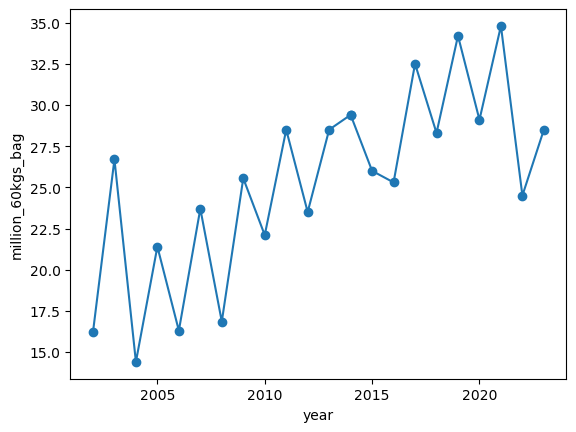

In [314]:
plt.plot(mg_df["year"], mg_df["million_60kgs_bag"], marker="o")
plt.xlabel("year")
plt.ylabel("million_60kgs_bag")
plt.show()
plt.close()

Throughout the years, there is a noticeable upward trend in Minas Gerais harvest outcomes. This suggests that harvests in Minas Gerais have become larger over time, with some fluctuations. There was a huge decline around 2004 and 2022 and high peaks in 2003, 2011, 2017 & 2021

<Axes: xlabel='bear_mill_trees', ylabel='million_60kgs_bag'>

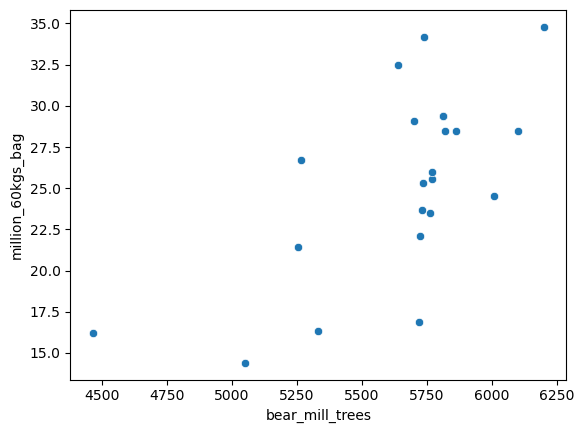

In [315]:
sns.scatterplot(data=mg_df, x="bear_mill_trees", y="million_60kgs_bag")

Additionally, there is a visible trend where there's an increase in the number of bearing trees which corresponds to the higher harvest outcomes. This could be potentially why there is an higher harvest outcome throughout the years.

 Are these harvest outcomes similar to other regions in Brazil? 
 
 Which region produces the most coffee (by sub-category) in Brazil?  

<Axes: xlabel='subdivision', ylabel='million_60kgs_bag'>

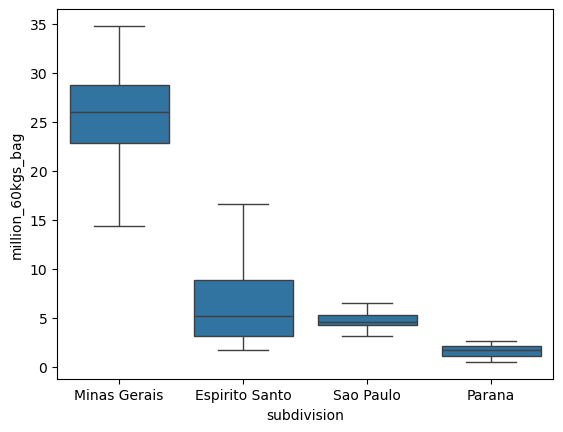

In [316]:
sns.boxplot(data=br_df, x="subdivision", y="million_60kgs_bag")

Minas Gerais harvest outcomes are not similar to other regions in Brazil. They had a way better harvest outcome compared to the other regions. Additonally, their harvest numbers is way higher than the rest by more than 10 million. 

Based off this, since Minas Gerais produced the most harvest in Brazil its safe to say they also produce the most coffee as well.

<Axes: xlabel='subdivision', ylabel='bear_mill_trees'>

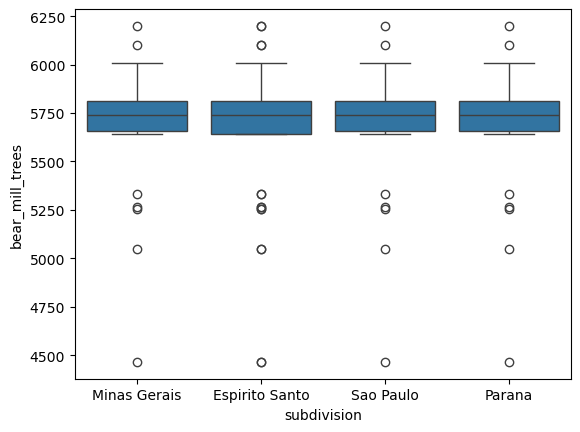

In [317]:
sns.boxplot(data=br_df, x="subdivision", y="bear_mill_trees")

Also, Minas Gerais having a better harvest than the other regions despite they all having the same amount of bearing trees could be due to them having better weather than the other regions. Better weather makes it easier for them to go out and actually harvest the trees and from that harvest produce coffee.

How has unemployment changed in the various coffee-producing regions of Brazil? 

In [318]:
unem_df = br_df.loc[:, ["year", "subdivision", "avg_unemp_perc"]]
 
unem_df.dropna()

,year,subdivision,avg_unemp_perc
4,2002,Parana,6.950
9,2003,Parana,7.160
14,2004,Parana,6.150
19,2005,Parana,6.710
24,2006,Parana,6.530
...,...,...,...
105,2022,Minas Gerais,7.150
106,2022,Espirito Santo,7.925
107,2022,Espirito Santo,7.925
108,2022,Sao Paulo,9.075


In [319]:
unem_df.groupby("subdivision")["avg_unemp_perc"].mean()

subdivision
Espirito Santo     9.585417
Minas Gerais       9.310417
Parana             6.640789
Sao Paulo         10.591667
Name: avg_unemp_perc, dtype: float64

How have weather outcomes changed for Minas Gerais throughout the years?  

In [320]:
mg_df2 = pd.read_csv("/Users/sa17/Desktop/projects/projects/weather_api/data/csv/mg_yearly.csv")

mg_df2 

,year,subdivision,million_60kgs_bag,nonbear_mill_trees,bear_mill_trees,avg_unemp_perc,temperature,relative humidity,precipitation,surface pressure
0,2022,Minas Gerais,24.5,1500.0,6010.0,7.15,18.6,78.0,0.0,911.4
1,2023,Minas Gerais,28.5,1510.0,6100.0,NaN,20.7,78.0,0.0,913.4
